<a href="https://colab.research.google.com/github/JanLeyva/approach_TFM/blob/master/MMF_HM_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python --version

Python 3.7.12


## <font color='#A8EB15'> <b> Set up enviorament </b>

The `mmf` framework is more stable with python 3.7.11. For this reason we going to create conda enviorament with it.

In [ ]:
#@title enviorament creation
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-py37_4.11.0-Linux-x86_64.sh 
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2021.10.26=h06a4308_2
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e15_1
    - charset-normalizer==2.0.4=pyhd3eb1b0_0
    - conda-content-trust==0.1.1=pyhd3eb1b0_0
    - conda-package-handling==1.7.3=py37h27cfd23_1
    - conda==4.11.0=py37h06a4308_0
    - cryptography==36.0.0=py37h9ce1e76_0
    - idna==3.3=pyhd3eb1b0_0
    - ld_impl_linux-64==2.35.1=h7274673_9
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.3.0=h5101ec6_17
    - libgomp==9.3.0=h5101ec6_17
    - libstdcxx-ng==9.3.0=hd4cf53a_17
    - ncurses==6.3=h7f8727e_2
    - openssl==1.1.1m=h7f8727e_0
    - pip==21.2.2=py37h06a4308_0
    - pycosat==0.6.3=py37h27cfd23_0
    - pycparser==2.21=pyhd3eb1b0_0
    - pyopenssl==21.0.0=py

--2022-05-19 18:08:31--  https://repo.continuum.io/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh [following]
--2022-05-19 18:08:31--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.11.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 103730670 (99M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.11.0-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 92.2M 1s
    50K .......... .......... .......... 

In [ ]:
!python --version # now returns Python 3.7.11 :: Anaconda, Inc.

Python 3.7.11


#### <font color='#A8EB15'> <b> GPU and Memory Check </b>

In [ ]:
# Checking GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu May 19 18:09:00 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Checking Memory
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


* Befor install mmf install specified versions of `torch` and `torchvision`

In [ ]:
#@title install torch and torchvision
# Install specified versions of `torch` and `torchvision`, before installing mmf (causes an issue)
!pip install torch==1.6.0 torchvision==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 552.8 MB 4.4 kB/s 
     |████████████████████████████████| 5.8 MB 575 kB/s 
     |████████████████████████████████| 829 kB 14.2 MB/s 
     |████████████████████████████████| 15.7 MB 57.8 MB/s 
     |████████████████████████████████| 3.1 MB 52.5 MB/s 
  Created wheel for future: filename=future-0.18.2-py3-none-any.whl size=491070 sha256=b37f8314da6d07dcfdf6396bd876e5d8a0c083b456dec76f2e69f34de9fc60ea
  Stored in directory: /root/.cache/pip/wheels/56/b0/fe/4410d17b32f1f0c3cf54cdfb2bc04d7b4b8f4ae377e2229ba0
Successfully built future


In [ ]:
import os
home = "/content"
os.chdir(home)
os.getcwd()
!ls

drive  Miniconda3-py37_4.11.0-Linux-x86_64.sh  sample_data


##  <font color='#A8EB15'> <b> MMF Configuration </b>


* <font color='#FFC300'> Restart RUNTIME at the end. </font>
*  <font color='#FFC300'> Remember to Mount Google Drive the first time. </font>
* <font color='#FFC300'> Change the github branch if you want the default features  </font>

In [ ]:
# own repo modify the errors 572 and 573
!git clone --branch develope --config core.symlinks=true https://github.com/JanLeyva/mmf.git

In [ ]:
# Clone the following repo where mmf does not install default image features, 
# since we will use our own features

# !git clone --branch nofeatures --config core.symlinks=true https://github.com/JanLeyva/mmf.git

In [ ]:
!ls mmf/projects/hateful_memes/configs/mmbt	  

defaults.yaml  with_features.yaml


In [ ]:
import os
home = "/content"
os.chdir(home)
os.getcwd()

'/content'

In [ ]:
# change the dir to mmf
import os
home = "/content"
os.chdir(os.path.join(home, "mmf"))
!pip install --editable .

Obtaining file:///content/mmf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Cloning https://github.com/PyTorchLightning/pytorch-lightning (to revision 9b011606f) to /tmp/pip-install-ak5m30ye/pytorch-lightning_0af18d35096c455c81830811809d724c
  Running command git clone -q https://github.com/PyTorchLightning/pytorch-lightning /tmp/pip-install-ak5m30ye/pytorch-lightning_0af18d35096c455c81830811809d724c
  Running command git checkout -q 9b011606f
  Resolved https://github.com/PyTorchLightning/pytorch-lightning to commit 9b011606f
  Running command git submodule update --init --recursive -q
  From https://github.com/PyTorchLightning/lightning-tutorials
   * branch            290fb466de1fcc2ac6025f74b56906592911e856 -> FETCH_HEAD
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.9 MB 8.2 MB/s 


##  <font color='#A8EB15'> <b> UnZip dataset

In [ ]:
import os
home = "/content"
os.chdir(home)

In [ ]:
%%time 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Dbl-CQI61U3kDzzttE37lgl22b0Ay_nD' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1Dbl-CQI61U3kDzzttE37lgl22b0Ay_nD" -O hateful_memes.zip && rm -rf /tmp/cookies.txt

--2022-05-19 18:14:34--  https://docs.google.com/uc?export=download&confirm=t&id=1Dbl-CQI61U3kDzzttE37lgl22b0Ay_nD
Resolving docs.google.com (docs.google.com)... 108.177.126.113, 108.177.126.138, 108.177.126.100, ...
Connecting to docs.google.com (docs.google.com)|108.177.126.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8qqdr8gvuj3nr0tqcpvs6se8vl0qi0jb/1652984025000/01761641334275034120/*/1Dbl-CQI61U3kDzzttE37lgl22b0Ay_nD?e=download [following]
--2022-05-19 18:14:34--  https://doc-00-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8qqdr8gvuj3nr0tqcpvs6se8vl0qi0jb/1652984025000/01761641334275034120/*/1Dbl-CQI61U3kDzzttE37lgl22b0Ay_nD?e=download
Resolving doc-00-44-docs.googleusercontent.com (doc-00-44-docs.googleusercontent.com)... 142.250.145.132, 2a00:1450:4013:c14::84
Connecting to doc-00-44-docs.googleusercontent.com (doc-

In [ ]:

# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1XiwUjy9BSwKw2x3eDDOG7e8tHrntj1l3" -O hateful_memes.zip && rm -rf /tmp/cookies.txt

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
!ls

drive  hateful_memes.zip  Miniconda3-py37_4.11.0-Linux-x86_64.sh  sample_data


In [ ]:
!unzip -P "pass" "/content/hateful_memes.zip"

Archive:  /content/hateful_memes.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/hateful_memes.zip or
        /content/hateful_memes.zip.zip, and cannot find /content/hateful_memes.zip.ZIP, period.


In [ ]:
%%bash
# cp drive/MyDrive/datasetZIP/hateful_memesv3.zip "/content"
mmf_convert_hm --zip_file="hateful_memesv3.zip" --password="pass" --bypass_checksum 1

Data folder is /root/.cache/torch/mmf/data
Zip path is hateful_memesv3.zip
Copying hateful_memesv3.zip
Unzipping hateful_memesv3.zip
Extracting the zip can take time. Sit back and relax.


/usr/local/lib/python3.7/site-packages/omegaconf/resolvers/__init__.py:13: UserWarning: The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573
  "The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573"
/usr/local/lib/python3.7/site-packages/omegaconf/grammar_visitor.py:257: UserWarning: In the sequence `MMF_LOG_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  category=UserWarning,
/usr/local/lib/python3.7/site-packages/omegaconf/grammar_visitor.py:257: UserWarning: In the sequence `MMF_REPORT_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  category=UserWarning,
/usr/local/lib/python3.7/site-packages/omegaconf/grammar_visitor.py:257: UserWarning: In the sequence `MMF_TENSORBOARD_LOGDIR,` some elements are missing: please replace them with empty

In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images    

dev_seen.jsonl	  hateful_memesv3.zip  LICENSE.txt	test_unseen.jsonl
dev_unseen.jsonl  hateful_memes.zip    README.md	train.jsonl
hateful_memes	  img		       test_seen.jsonl


In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img/ | wc -l

12140


In [ ]:
# Free up the disk by removing .zip, .tar files
!rm -rf /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/hateful_memesv3.zip
!rm -rf $home/hateful_memesv3.zip
!rm -rf $home/Miniconda3-py37_4.11.0-Linux-x86_64.sh

##  <font color='#A8EB15'> <b> Conf before Train </b>

In [ ]:
!pip install future

In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/

images


* Creamos el directorio `annotations`
* pasamos todo el directorio `images` to `annotations`



In [ ]:
!mkdir /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations

In [ ]:
!cp  /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/*  /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations

cp: -r not specified; omitting directory '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/hateful_memes'
cp: -r not specified; omitting directory '/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img'


In [ ]:
!mkdir /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/img

In [ ]:
!cp  /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/images/img/* /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/img

In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/

dev_seen.jsonl	   img		test_seen.jsonl
dev_unseen.jsonl   LICENSE.txt	test_unseen.jsonl
hateful_memes.zip  README.md	train.jsonl


In [ ]:
!ls /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/img | wc -l 

12140


In [ ]:
# !cp -R save/* drive/MyDrive/save_model2

In [ ]:
# we try to change the folder name

In [ ]:
# @title help function [ConfMatrix]


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from sklearn import metrics


def plotHeatMap(X, classes, title=None, fmt='.2g', ax=None, xlabel=None, ylabel=None):
    """ Fix heatmap plot from Seaborn with pyplot 3.1.0, 3.1.1
        https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
    """
    ax = sns.heatmap(X, xticklabels=classes, yticklabels=classes, annot=True, \
                     fmt=fmt, cmap=plt.cm.Blues, ax=ax) #notation: "annot" not "annote"
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
        
def plotConfusionMatrix(yTrue, yEst, classes, title=None, fmt='.2g', ax=None):
    plotHeatMap(metrics.confusion_matrix(yTrue, yEst), classes, title, fmt, ax, xlabel='Estimations', \
                ylabel='True values'); 

#<font color='#A8EB15'> <b> VilBERT </b>

In [ ]:
!mmf_run config="projects/hateful_memes/configs/vilbert/defaults.yaml" \
        model="vilbert" \
        dataset=hateful_memes \
        run_type=train_val \
        checkpoint.max_to_keep=1 \
        checkpoint.resume_zoo=visual_bert.pretrained.cc.full \
        training.tensorboard=True \
        training.checkpoint_interval=50 \
        training.evaluation_interval=50 \
        training.max_updates=3000 \
        training.log_interval=100 \
        dataset_config.hateful_memes.max_features=100 \
        training.lr_ratio=0.3 \
        training.use_warmup=True \
        training.batch_size=32 \
        optimizer.params.lr=5.0e-05 \
        env.save_dir=./sub1 \
        env.tensorboard_logdir=logs/fit/sub1 \

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
# !mmf_run config=projects/hateful_memes/configs/vilbert/defaults.yaml \
#   model=vilbert \
#   dataset=hateful_memes \
#   training.log_interval=50 \
#   training.max_updates=3000 \
#   training.batch_size=16 \
#   training.evaluation_interval=500

2022-03-19T18:23:12 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/vilbert/defaults.yaml
2022-03-19T18:23:12 | mmf.utils.configuration: Overriding option model to vilbert
2022-03-19T18:23:12 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-19T18:23:12 | mmf.utils.configuration: Overriding option training.log_interval to 50
2022-03-19T18:23:12 | mmf.utils.configuration: Overriding option training.max_updates to 3000
2022-03-19T18:23:12 | mmf.utils.configuration: Overriding option training.batch_size to 16
2022-03-19T18:23:12 | mmf.utils.configuration: Overriding option training.evaluation_interval to 500
2022-03-19T18:23:12 | mmf: Logging to: ./save/train.log
2022-03-19T18:23:12 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/vilbert/defaults.yaml', 'model=vilbert', 'dataset=hateful_memes', 'training.log_interval=50', 'training.max_updates=3000', 'training.ba

* <font color='#A8EB15'> Predictions in test set

In [ ]:
!mmf_predict config=projects/hateful_memes/configs/vilbert/defaults.yaml \
    model=vilbert \
    dataset=hateful_memes \
    run_type=test \
    checkpoint.resume_file=save/best.ckpt

2022-03-19T19:14:27 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/vilbert/defaults.yaml
2022-03-19T19:14:27 | mmf.utils.configuration: Overriding option model to vilbert
2022-03-19T19:14:27 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-19T19:14:27 | mmf.utils.configuration: Overriding option run_type to test
2022-03-19T19:14:27 | mmf.utils.configuration: Overriding option checkpoint.resume_file to save/best.ckpt
2022-03-19T19:14:27 | mmf.utils.configuration: Overriding option evaluation.predict to true
2022-03-19T19:14:27 | mmf: Logging to: ./save/train.log
2022-03-19T19:14:27 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/vilbert/defaults.yaml', 'model=vilbert', 'dataset=hateful_memes', 'run_type=test', 'checkpoint.resume_file=save/best.ckpt', 'evaluation.predict=true'])
2022-03-19T19:14:27 | mmf_cli.run: Torch version: 1.9.0+cu102
2022-03-19T19:14:27 

#### <font color='#A8EB15'> Confusion Matrix

In [ ]:
import pandas as pd
pred = pd.read_csv("/content/mmf/save/hateful_memes_vilbert_27267814/reports/hateful_memes_run_test_2022-03-19T19:15:14.csv")
test = pd.read_json("/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl", lines = True)

Accuracy: 0.6955


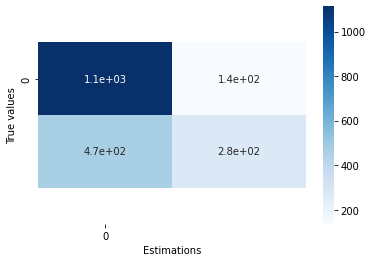

In [ ]:
# Confusion Martix
plotConfusionMatrix(test['label'], pred['label'], 2)
ConfMatrix=metrics.confusion_matrix(test['label'], pred['label'])
print("Accuracy:", (ConfMatrix[0][0]+ConfMatrix[1][1])/2000)

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test['label'], pred['proba'],  pos_label=1)
metrics.auc(fpr, tpr)

0.7272117333333333

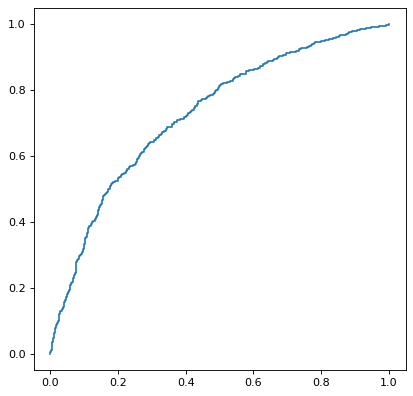

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


figure(figsize=(6, 6), dpi=80)
plt.plot(fpr, tpr)

* save the model

In [ ]:
!ls

In [ ]:
!mkdir drive/MyDrive/ViLbert

In [ ]:
!cp -r save/* drive/MyDrive/ViLbert

# <font color='#A8EB15'> <b> VisualBERT </b>

In [ ]:
!mmf_run config="projects/hateful_memes/configs/visual_bert/direct.yaml" \
        model="visual_bert" \
        dataset=hateful_memes \
        run_type=train_val \
        checkpoint.max_to_keep=1 \
        checkpoint.resume_zoo=visual_bert.pretrained.cc.full \
        training.tensorboard=True \
        training.checkpoint_interval=50 \
        training.evaluation_interval=50 \
        training.max_updates=3000 \
        training.log_interval=100 \
        dataset_config.hateful_memes.max_features=100 \
        training.lr_ratio=0.3 \
        training.use_warmup=True \
        training.batch_size=32 \
        optimizer.params.lr=5.0e-05 \
        env.save_dir=./sub1 \
        env.tensorboard_logdir=logs/fit/sub1 \

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
# !mmf_run config=projects/hateful_memes/configs/visual_bert/direct.yaml \
#   model=visual_bert \
#   dataset=hateful_memes \
#   training.log_interval=50 \
#   training.max_updates=3000 \
#   training.batch_size=16 \
#   training.evaluation_interval=500

2022-03-10T14:37:11 | matplotlib.font_manager: Generating new fontManager, this may take some time...
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert/direct.yaml
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.log_interval to 50
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.max_updates to 3000
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.batch_size to 16
2022-03-10T14:37:11 | mmf.utils.configuration: Overriding option training.evaluation_interval to 500
2022-03-10T14:37:11 | mmf: Logging to: ./save/train.log
2022-03-10T14:37:11 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert/direct.yaml', '

In [ ]:
!mmf_run config=projects/visual_bert/configs/hateful_memes/from_coco.yaml \
    model=visual_bert \
    dataset=hateful_memes \
    run_type=train_val

2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option config to projects/visual_bert/configs/hateful_memes/from_coco.yaml
2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-10T16:01:21 | mmf.utils.configuration: Overriding option run_type to train_val
2022-03-10T16:01:21 | mmf: Logging to: ./save/train.log
2022-03-10T16:01:21 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/visual_bert/configs/hateful_memes/from_coco.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'run_type=train_val'])
2022-03-10T16:01:21 | mmf_cli.run: Torch version: 1.9.0+cu102
2022-03-10T16:01:21 | mmf.utils.general: CUDA Device 0 is: Tesla T4
2022-03-10T16:01:21 | mmf_cli.run: Using seed 21300645
2022-03-10T16:01:21 | mmf.trainers.mmf_trainer: Loading datasets
loading configuration file https://huggingface.co/bert-base-uncased/re

In [ ]:
!mmf_predict config=projects/hateful_memes/configs/visual_bert//direct.yaml \
    model=visual_bert \
    dataset=hateful_memes \
    run_type=test \
    checkpoint.resume_file=save/best.ckpt

2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert//direct.yaml
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option run_type to test
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option checkpoint.resume_file to save/best.ckpt
2022-03-10T15:53:08 | mmf.utils.configuration: Overriding option evaluation.predict to true
2022-03-10T15:53:08 | mmf: Logging to: ./save/train.log
2022-03-10T15:53:08 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert//direct.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'run_type=test', 'checkpoint.resume_file=save/best.ckpt', 'evaluation.predict=true'])
2022-03-10T15:53:08 | mmf_cli.run: Torch version: 1.9.0+cu102
2022-0

* Copy the model to Drive

In [ ]:
!ls drive/MyDrive/

'Colab Notebooks'	    mmfv3.zip	    'saveVisualBERT (1)'
 CV_Jan_Leyva.pdf	    mmfv5.zip	     SL_Test
 datasetZIP		    Pythonfiles      STATICAL_LEARNING
'EIO - UPC'		    save_model	     TFMdataset
 Final_Assignment_MVA.zip   save_model2
'MESIO - UPC'		    saveVisualBERT


In [ ]:
!cp -r save drive/MyDrive/saveVisualBERT

In [ ]:
import pandas as pd
pred = pd.read_csv("/content/save/hateful_memes_visual_bert_8294730/reports/hateful_memes_run_test_2022-03-10T15:54:05.csv")
test = pd.read_json("/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl", lines = True)

Accuracy: 0.688


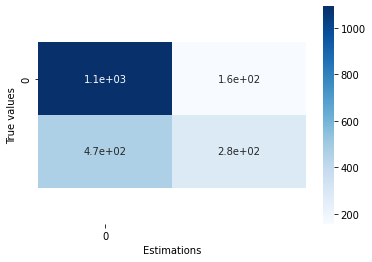

In [ ]:
# Confusion Martix
plotConfusionMatrix(test['label'], pred['label'], 2)
ConfMatrix=metrics.confusion_matrix(test['label'], pred['label'])
print("Accuracy:", (ConfMatrix[0][0]+ConfMatrix[1][1])/2000)

In [ ]:
!cp /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl drive/MyDrive

# <font color='#A8EB15'> <b> VisualBERT COCO </b>

In [ ]:
os.chdir("/content")
# # Define where image features are
# feats_dir = os.path.join(home, "features")
# # Define where train.jsonl is
# train_dir = os.path.join(home, "train_v9.jsonl")

!mmf_run config="projects/visual_bert/configs/hateful_memes/from_coco.yaml" \
        model="visual_bert" \
        dataset=hateful_memes \
        run_type=train_val \
        checkpoint.max_to_keep=1 \
        checkpoint.resume_zoo=visual_bert.pretrained.cc.full \
        training.tensorboard=True \
        training.checkpoint_interval=50 \
        training.evaluation_interval=50 \
        training.max_updates=3000 \
        training.log_interval=100 \
        dataset_config.hateful_memes.max_features=100 \
        training.lr_ratio=0.3 \
        training.use_warmup=True \
        training.batch_size=32 \
        optimizer.params.lr=5.0e-05 \
        env.save_dir=./sub1 \
        env.tensorboard_logdir=logs/fit/sub1 \

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
# !mmf_run config=projects/hateful_memes/configs/visual_bert/from_coco.yaml \
#   model=visual_bert \
#   dataset=hateful_memes \
#   training.log_interval=50 \
#   training.max_updates=3000 \
#   training.batch_size=16 \
#   training.evaluation_interval=500

2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert/from_coco.yaml
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option training.log_interval to 50
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option training.max_updates to 3000
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option training.batch_size to 16
2022-03-13T14:04:16 | mmf.utils.configuration: Overriding option training.evaluation_interval to 500
2022-03-13T14:04:16 | mmf: Logging to: ./save/train.log
2022-03-13T14:04:16 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert/from_coco.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'training.log_interval=50', 'training.max_updates=3

* <font color='#A8EB15'> <b> Evaluation on Validation set </b>

In [ ]:
!mmf_run config=projects/hateful_memes/configs/visual_bert/from_coco.yaml \
              model=visual_bert \
              dataset=hateful_memes \
              run_type=val \
              checkpoint.resume_file=save/best.ckpt \
              checkpoint.resume_pretrained=False

2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert/from_coco.yaml
2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option run_type to val
2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option checkpoint.resume_file to save/best.ckpt
2022-03-13T14:49:19 | mmf.utils.configuration: Overriding option checkpoint.resume_pretrained to False
2022-03-13T14:49:19 | mmf: Logging to: ./save/train.log
2022-03-13T14:49:19 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert/from_coco.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'run_type=val', 'checkpoint.resume_file=save/best.ckpt', 'checkpoint.resume_pretrained=False'])
2022-03-13T14:49:19 | mmf_cli.run: Torch ver

* <font color='#A8EB15'> <b> Predict on Test set

In [ ]:
!mmf_predict config=projects/hateful_memes/configs/visual_bert/from_coco.yaml \
              model=visual_bert \
              dataset=hateful_memes \
              run_type=test \
              checkpoint.resume_file=save/best.ckpt

2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option config to projects/hateful_memes/configs/visual_bert/from_coco.yaml
2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option model to visual_bert
2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option datasets to hateful_memes
2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option run_type to test
2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option checkpoint.resume_file to save/best.ckpt
2022-03-13T15:02:10 | mmf.utils.configuration: Overriding option evaluation.predict to true
2022-03-13T15:02:10 | mmf: Logging to: ./save/train.log
2022-03-13T15:02:10 | mmf_cli.run: Namespace(config_override=None, local_rank=None, opts=['config=projects/hateful_memes/configs/visual_bert/from_coco.yaml', 'model=visual_bert', 'dataset=hateful_memes', 'run_type=test', 'checkpoint.resume_file=save/best.ckpt', 'evaluation.predict=true'])
2022-03-13T15:02:10 | mmf_cli.run: Torch version: 1.9.0+cu102
20

In [ ]:
import pandas as pd
pred = pd.read_csv("/content/save/hateful_memes_visual_bert_10792640/reports/hateful_memes_run_test_2022-03-13T15:02:46.csv")
test = pd.read_json("/root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/annotations/test_unseen.jsonl", lines = True)

In [ ]:
sum(pred['label'] == test['label'])

837

Accuracy: 0.6335


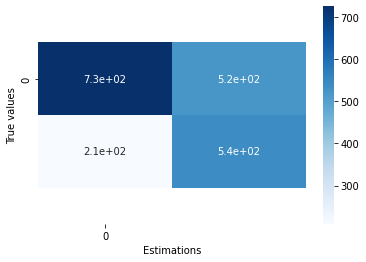

In [ ]:
# Confusion Martix
plotConfusionMatrix(test['label'], pred['label'], 2)
ConfMatrix=metrics.confusion_matrix(test['label'], pred['label'])
print("Accuracy:", (ConfMatrix[0][0]+ConfMatrix[1][1])/2000)

In [ ]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(test['label'], pred['proba'],  pos_label=1)
metrics.auc(fpr, tpr)

0.6992773333333333

In [ ]:
!cp -r save/* drive/MyDrive/VisBERTCOCO

In [ ]:
!mkdir drive/MyDrive/VisBERTCOCO

# <font color='#A8EB15'> <b> Summary Models - Baseline</b> </font>

|Model| Acc. Val   | AuROC Val  | Acc. Test  |  AuROC Test |
|--        -|-    --|-     --|--     -|--     -|
| mmbt      | 63.33  | 62.83  | 66.05  | 67.15 |
| VisualBERT| 68.15  | 67.36  | 68.80  | 72.57 |
| VilBERT   | 68.15  | 68.93  | 69.15  | 71.46 |
| VisualBERT COCO| 69.63 | 72.44 | 70.70 | 76.09|
| concat_bert| 62.78 | 62.78  |       |       |      |